In [152]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,validation_curve,learning_curve,ShuffleSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import ValidationCurve
import pickle

In [5]:
#!pip install pycaret

In [153]:
df = pd.read_csv("/content/train_NIR5Yl1.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [8]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [154]:
df = df.drop(columns=["ID","Username"],axis=1)

In [155]:
df.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [156]:
encoder = LabelEncoder()

In [157]:
df["Tag"] = encoder.fit_transform(df["Tag"])

In [158]:
df.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [159]:
x = df.drop(columns=["Upvotes"],axis=1)
y = df["Upvotes"]

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [161]:
RF = RandomForestRegressor()

In [82]:
RF.fit(X_train, Y_train)

RandomForestRegressor()

In [83]:
predRF = RF.predict(X_test)

In [22]:
print( mean_absolute_error(Y_test,predRF), mean_squared_error(Y_test,predRF), r2_score(Y_test,predRF), mean_squared_log_error(Y_test,predRF))

112.36894811792689 1707382.7047035655 0.8862887574050509 0.7893200954405633


In [20]:
#pickle.dump(RF,open("Up-Votes_Model.sav","wb"))

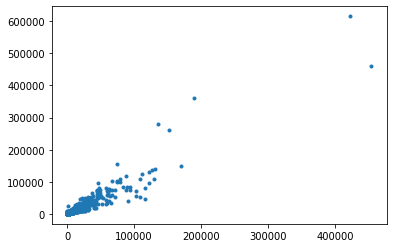

In [31]:
plt.plot(predRF,Y_test,".")
plt.show()

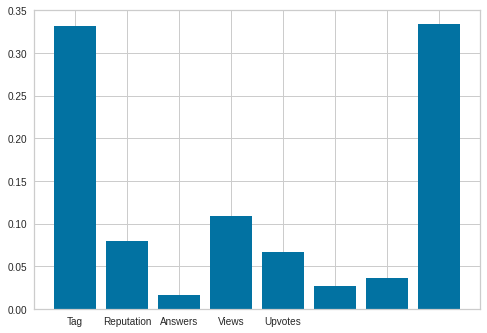

In [149]:
plt.bar( range(len(RF.feature_importances_)), RF.feature_importances_)
plt.xticks(range(len(RF.feature_importances_)), df.columns)
plt.show()

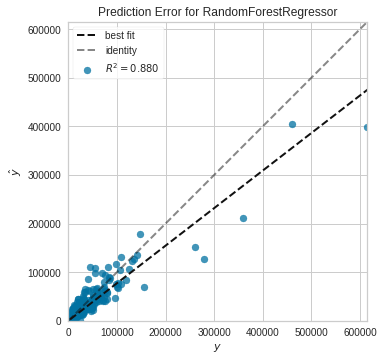

In [162]:
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show() 

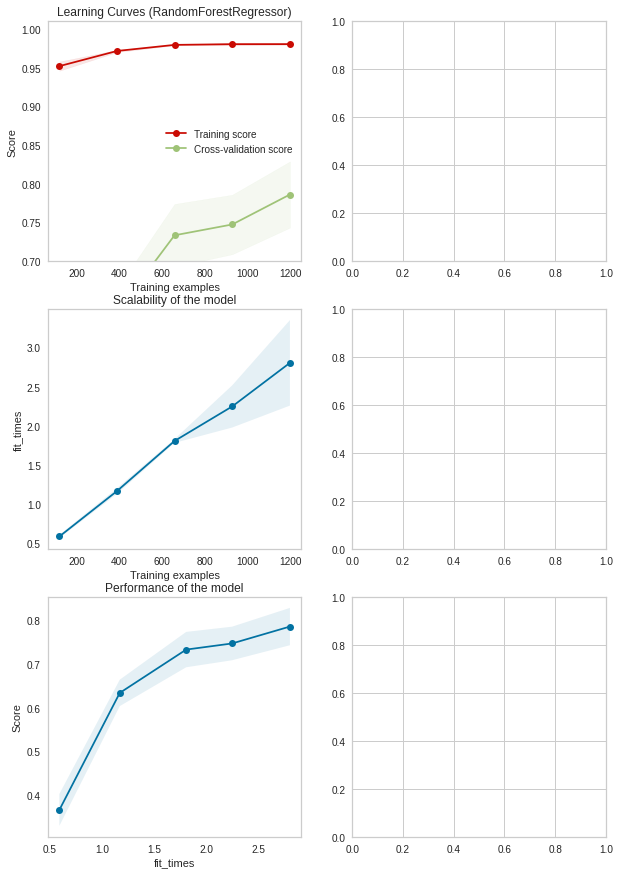

In [68]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, "Learning Curve (RandomForestRegressor)", X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=3, n_jobs=4)



plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


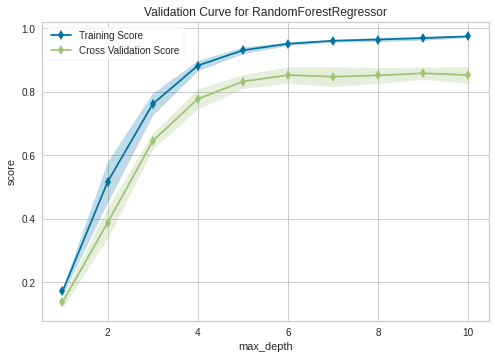

In [165]:
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=3, scoring="r2"
)

viz.fit(x, y)
viz.show()